# Basic Sound Processing with python
see blog http://samcarcagno.altervista.org/blog/basic-sound-processing-python/
To be done in future


In [95]:
from pylab import *
from scipy.io import wavfile
import matplotlib.pyplot as plt

%matplotlib inline

sampFreq, snd = wavfile.read('../1.wav')
sampNum = snd.shape[0] # 采样点数
#16位wav对应int16格式, 32类似
#snd.dtype ==> dtype('int16'), 表示声压的范围在-2**15到2**15之间
#sampFreq ==> 44100
snd

array([-15, -11, -15, ..., -18, -16, -14], dtype=int16)

In [96]:
print('wav 采样点数 is: ', snd.shape) # 第二个值是通道数量，没有的话应该为1 
print('wav duration is :', snd.shape[0]/sampFreq)

wav 采样点数 is:  (132300,)
wav duration is : 3.0


In [97]:
#归一化
snd = snd/(2.**15)
snd

array([-0.00045776, -0.00033569, -0.00045776, ..., -0.00054932,
       -0.00048828, -0.00042725])

# 绘制音频图

In [98]:
#如果是多通道的音频，用这个取一个通道，这里的音频只有一个，所以不需要取
#s1 = snd[:,0]
s1 = snd

In [99]:
time = arange(0, s1.shape[0], 1) #采样点数量
time

array([     0,      1,      2, ..., 132297, 132298, 132299])

In [100]:
time = time / sampFreq # 得到以秒为单位的时长
time

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       2.99993197e+00, 2.99995465e+00, 2.99997732e+00])

In [101]:
time = time * 1000 # 得到以毫秒为单位的时长
time

array([0.00000000e+00, 2.26757370e-02, 4.53514739e-02, ...,
       2.99993197e+03, 2.99995465e+03, 2.99997732e+03])

Text(0.5,0,'Time (ms)')

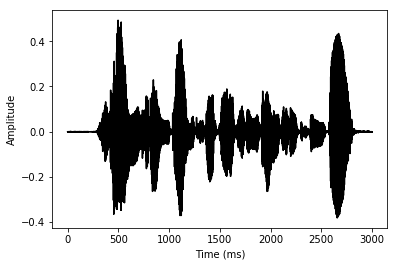

In [102]:
plt.plot(time, s1, color='k')
ylabel('Amplitude')
xlabel('Time (ms)')

# 绘制频谱图

In [64]:
p = fft(s1) #执行傅里叶变换
print(p)
print(len(p))
# fft变换的返回结果为复合形式，比如复数，
# 包含幅度和相位信息。我们获取傅立叶变换的绝对值，
# 得到频率分量的幅度信息。

[-4.23436584e+01+0.        j  1.10132614e-01-0.06936723j
 -2.23434850e-02-0.06775518j ... -2.15079289e-02-0.03086122j
 -2.23434850e-02+0.06775518j  1.10132614e-01+0.06936723j]
132300


In [79]:
nUniquePts = int(ceil((sampNum+1)/2.0))
print(nUniquePts)
p = p[0:nUniquePts]
p = abs(p)
print(p)
print(len(p))

66151
[2.05337942e-59 1.30920866e-78 1.06689534e-80 ... 8.52325606e-88
 1.45980184e-86 5.81049673e-89]
66151


Text(0,0.5,'Power (dB)')

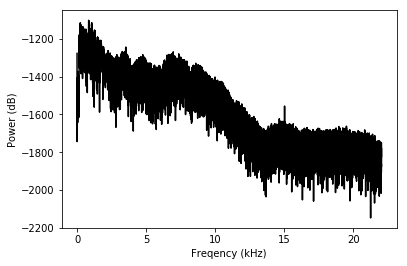

In [103]:
p = p / float(sampNum)    
#除以采样点数，去除幅度对信号长度或采样频率的依赖
p = p**2
#求平方得到能量

#乘2（详见技术手册）
#奇nfft排除奈奎斯特点
if sampNum % 2 > 0:       #fft点数为奇
    p[1:len(p)] = p[1:len(p)]*2
else:               #fft点数为偶
    p[1:len(p)-1] = p[1:len(p)-1] * 2

freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / sampNum)
plt.plot(freqArray/1000, 10*log10(p), color='k')
xlabel('Freqency (kHz)')
ylabel('Power (dB)')

In [82]:
# 计算信号能量
# 法1:计算均方根rms root mean square
rms_val = sqrt(mean(s1**2))
print(rms_val)
# 法2:计算所有频率上能量（fft的平方）的总和的开方，两个值应该一样
rms_fft = sqrt(sum(p))
print(rms_fft)

0.0634829019056027
2.2769684577414383e-25
